In [1]:
# define a Neuron networks class
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
# from lr_utils import load_dataset
%matplotlib inline

In [2]:
# define neronal network initializer
from random import seed
from random import random
from pprint import pprint

def NeuronNetwork_initializer(n_inputs, n_hidden, n_outputs):
    network = list()
    
    hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer = [{'weights':[random() for i in range(n_hidden +1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network


In [9]:
seed(1)
network = NeuronNetwork_initializer(2,4,2)

In [10]:
pprint(network)

[[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]},
  {'weights': [0.2550690257394217, 0.49543508709194095, 0.4494910647887381]},
  {'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349]},
  {'weights': [0.02834747652200631, 0.8357651039198697, 0.43276706790505337]}],
 [{'weights': [0.762280082457942,
               0.0021060533511106927,
               0.4453871940548014,
               0.7215400323407826,
               0.22876222127045265]},
  {'weights': [0.9452706955539223,
               0.9014274576114836,
               0.030589983033553536,
               0.0254458609934608,
               0.5414124727934966]}]]


In [702]:
for layer in network:
    pprint(layer)

[{'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'weights': [0.2550690257394217, 0.49543508709194095]},
 {'weights': [0.4494910647887381, 0.651592972722763]}]


In [703]:
# define an activate function for each neuron computes
# you can think bias that always is 1.0
# assumes that the bias is the last weight in the list of weights
from math import exp

def activate(weights, inputs):
    activation = weights[-1]
    for i in range(len(weights) - 1):
        activation += weights[i] * inputs[i]
    return activation

# output = 1 / (1 + e^(-activation))
def activation_sigmoid_transfer(activation):
    return 1.0/(1.0+exp(-activation))
def der_activation_sigmoid_transfer(output):
    return output*(1.0 - output)

def SME(predict, target):
    return (predict - target)**2
    

In [704]:
# forward propgation 
def forward_propagate(network, inputs):
    ''' inputs , the data set as inputs, and go for network forwar traversing 
        returns, hypothesis output
    '''
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = activation_sigmoid_transfer(activation)
            new_inputs.append(neuron['output'])
        inputs = new_inputs
    return inputs

    

In [705]:
network = network
inputs = [1, 0, None]
output = forward_propagate(network, inputs)
pprint(network)
pprint(output)

[[{'output': 0.7105668883115941,
   'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}],
 [{'output': 0.6629970129852887,
   'weights': [0.2550690257394217, 0.49543508709194095]},
  {'output': 0.7253160725279748,
   'weights': [0.4494910647887381, 0.651592972722763]}]]
[0.6629970129852887, 0.7253160725279748]


In [706]:
# output error calculate for output layer, 
# This error calculation is used for neurons in the output layer. 
# The expected value is the class value itself.
# error = (expected - output) * der_activation_sigmoid_transfer(output)

# output error calculate for hidden layer, 
# error = (weight_k * error_j) * transfer_derivative(output)

def backward_propagate_error(network, expected):
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = []
        #looping index from last -> first layer. e.g. 2,1,0
        if i != len(network)-1:
            # back forward for hidden layers
            print("hidden layer", i)
            for j in range(len(layer)):
                error = 0.0
                previous_layer = network[i+1]
                for neuron in previous_layer:
                    error +=(neuron['weights'][j] * neuron['delta'])
                    print("get error delta from previous layer ", neuron)
                print("set error in hidden layer", j)
                errors.append(error)
        else:
            # back forward for output layer
            print("output layer", i)
            for j in range(len(layer)):
                neuron = layer[j]
                print("set error in output layer", j)
                errors.append(expected[j] - neuron['output'])
        # calculate delta for each neuron        
        for j in range(len(layer)):
            neuron = layer[j]
            print("layer %d neuron %d th ->"% (i,j))
#             print("Layer{}, neurons: {}".format(j, neuron))
            # gredient descent to minimize the delta??? NOT Sure
            neuron['delta'] = errors[j] * der_activation_sigmoid_transfer(neuron['output'])
            print("update delta: ", neuron['delta'])
    


In [707]:
from pprint import pprint
network = network
expected = [0, 1]
backward_propagate_error(network, expected)

output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  -0.14813473120687762
layer 1 neuron 1 th ->
update delta:  0.05472601157879688
hidden layer 0
get error delta from previous layer  {'weights': [0.2550690257394217, 0.49543508709194095], 'output': 0.6629970129852887, 'delta': -0.14813473120687762}
get error delta from previous layer  {'weights': [0.4494910647887381, 0.651592972722763], 'output': 0.7253160725279748, 'delta': 0.05472601157879688}
set error in hidden layer 0
layer 0 neuron 0 th ->
update delta:  -0.002711797799238243


In [708]:
for layer in network:
    pprint(layer)

[{'delta': -0.002711797799238243,
  'output': 0.7105668883115941,
  'weights': [0.13436424411240122, 0.8474337369372327, 0.763774618976614]}]
[{'delta': -0.14813473120687762,
  'output': 0.6629970129852887,
  'weights': [0.2550690257394217, 0.49543508709194095]},
 {'delta': 0.05472601157879688,
  'output': 0.7253160725279748,
  'weights': [0.4494910647887381, 0.651592972722763]}]


In [709]:
# update weights
# weight = weight + learning_rate*error*input

# when forward and backforward propagation has performed, then we will need update weights
def update_weights(network, inputs, l_rate):
    for i in range(len(network)):
        inputs = inputs[:-1]
        if i !=0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                '''gradient descent here for weights'''
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j] # for weights with inputs, gradient descent
                print("update weights for neuron", neuron['weights'][j])
            '''gradient descent here for bias'''    
            neuron['weights'][-1] += l_rate * neuron['delta'] # for bias



In [710]:
# when forward and backforward propagation has performed, then we will need update weights
def update_weights_batch_gradient(network, inputs, l_rate):
    for i in range(len(network)):
        sum_der_weights = 0.0
        inputs = inputs[:-1]
        if i !=0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        
        for neuron in network[i]:
            print("network[i] ==>", network[i])
            for j in range(len(inputs)):
                '''gradient descent here for weights'''
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j] # for weights with inputs, gradient descent
                
            '''gradient descent here for bias'''    
            neuron['weights'][-1] += l_rate * neuron['delta'] # for bias

## Train network

The network is updated using **stochastic gradient descent**
Because updates are made for each training pattern, this type of learning is called online learning. If errors were accumulated across an epoch before updating the weights, this is called batch learning or batch gradient descent.


In [669]:
def train_network(network, train_sets, l_rate, n_epoch, n_outputs):
    error_history = []
    
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train_sets:
            outputs = forward_propagate(network, row)
            target = [0 for i in range(n_outputs)] # numbers of set({[0,1]) -> 2
            target[row[-1]] = 1
            print("target for each row->",target)

#             sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            for i in range(len(target)):
                _error = SME(target[i], outputs[i])
                sum_error = sum_error + _error
#                 print("__error {}, sum_error :{}".format(_error, sum_error))
            backward_propagate_error(network, target)
            update_weights(network, row, l_rate)
        error_history.append(sum_error)
        print('>epoch={}, lrate={:.3f}, error={:.3f}, accuracy {:.2f}%'.format(epoch, l_rate, sum_error, 100*(1.0-sum_error)))
    return epoch, error_history, network


In [673]:
# Test training backprop algorithm
seed(1)
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
n_inputs = len(dataset[0]) - 1
n_outputs = len(set([row[-1] for row in dataset]))
network = NeuronNetwork_initializer(n_inputs, 2, n_outputs)
epoch, error_history, network = train_network(network, dataset, 0.5, 100, n_outputs)
# for layer in network:
# 	print(layer)
    


target for each row-> [1, 0]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  0.029379162360871295
layer 1 neuron 1 th ->
update delta:  -0.13553299084477086
hidden layer 0
get error delta from previous layer  {'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349], 'output': 0.8094918973879515, 'delta': 0.029379162360871295}
get error delta from previous layer  {'weights': [0.02834747652200631, 0.8357651039198697, 0.43276706790505337], 'output': 0.7734292563511262, 'delta': -0.13553299084477086}
set error in hidden layer 0
get error delta from previous layer  {'weights': [0.651592972722763, 0.7887233511355132, 0.0938595867742349], 'output': 0.8094918973879515, 'delta': 0.029379162360871295}
get error delta from previous layer  {'weights': [0.02834747652200631, 0.8357651039198697, 0.43276706790505337], 'output': 0.7734292563511262, 'delta': -0.13553299084477086}
set error in hidden layer 1
layer 0 neuron 0 th -

get error delta from previous layer  {'weights': [0.4442356798464941, 0.4951128197821499, -0.20821811716788458], 'output': 0.6381535000363746, 'delta': -0.1473583287004723}
get error delta from previous layer  {'weights': [-0.5804675210303414, 0.35273354146141145, -0.14393526482154095], 'output': 0.4248011703083149, 'delta': 0.14054703627553375}
set error in hidden layer 0
get error delta from previous layer  {'weights': [0.4442356798464941, 0.4951128197821499, -0.20821811716788458], 'output': 0.6381535000363746, 'delta': -0.1473583287004723}
get error delta from previous layer  {'weights': [-0.5804675210303414, 0.35273354146141145, -0.14393526482154095], 'output': 0.4248011703083149, 'delta': 0.14054703627553375}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  -0.024097270273447657
layer 0 neuron 1 th ->
update delta:  -0.002906690548556055
update weights for neuron -0.3217109345021806
update weights for neuron 0.8214287889102049
update weights for neuron 0.044180574

layer 0 neuron 0 th ->
update delta:  0.015719203481821917
layer 0 neuron 1 th ->
update delta:  -0.0019692182580120354
update weights for neuron -0.6676908688004635
update weights for neuron 0.8328823318485337
update weights for neuron 0.04143916977784196
update weights for neuron 0.30367376196417706
update weights for neuron 0.5978998792400259
update weights for neuron 0.36428800140938983
update weights for neuron -0.7745039771855609
update weights for neuron 0.41153983403791045
target for each row-> [1, 0]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  0.09975866094887877
layer 1 neuron 1 th ->
update delta:  -0.09860390706829758
hidden layer 0
get error delta from previous layer  {'weights': [0.5978998792400259, 0.36428800140938983, -0.3830649936715772], 'output': 0.5881614042952532, 'delta': 0.09975866094887877}
get error delta from previous layer  {'weights': [-0.7745039771855609, 0.41153983403791045, -0.05849554863851

layer 1 neuron 1 th ->
update delta:  0.11780293120100367
hidden layer 0
get error delta from previous layer  {'weights': [0.9923328099925451, 0.318077896667603, -0.4427690382007493], 'output': 0.4906597910927263, 'delta': -0.1226221428571435}
get error delta from previous layer  {'weights': [-1.1666721957850863, 0.42789421100398506, -0.03489924722192907], 'output': 0.5273718670839855, 'delta': 0.11780293120100367}
set error in hidden layer 0
get error delta from previous layer  {'weights': [0.9923328099925451, 0.318077896667603, -0.4427690382007493], 'output': 0.4906597910927263, 'delta': -0.1226221428571435}
get error delta from previous layer  {'weights': [-1.1666721957850863, 0.42789421100398506, -0.03489924722192907], 'output': 0.5273718670839855, 'delta': 0.11780293120100367}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  -0.03486901168156724
layer 0 neuron 1 th ->
update delta:  0.001990982558094243
update weights for neuron -0.9595650873812026
update weights 

set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  0.06595700180146083
layer 1 neuron 1 th ->
update delta:  -0.05740838168096094
hidden layer 0
get error delta from previous layer  {'weights': [1.549899478980006, 0.11499173763792536, -0.6469509857578739], 'output': 0.6910614358143525, 'delta': 0.06595700180146083}
get error delta from previous layer  {'weights': [-1.693215478301487, 0.5960626187887047, 0.13253459422853292], 'output': 0.2829526248244701, 'delta': -0.05740838168096094}
set error in hidden layer 0
get error delta from previous layer  {'weights': [1.549899478980006, 0.11499173763792536, -0.6469509857578739], 'output': 0.6910614358143525, 'delta': 0.06595700180146083}
get error delta from previous layer  {'weights': [-1.693215478301487, 0.5960626187887047, 0.13253459422853292], 'output': 0.2829526248244701, 'delta': -0.05740838168096094}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  0.02060365529950689
layer 0 

update weights for neuron -2.298800092020916
update weights for neuron 0.8390193954893636
target for each row-> [0, 1]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  -0.054353189436818966
layer 1 neuron 1 th ->
update delta:  0.04850172348889989
hidden layer 0
get error delta from previous layer  {'weights': [2.220463111011066, -0.1594150524821784, -0.8391871788692091], 'output': 0.2735289983156851, 'delta': -0.054353189436818966}
get error delta from previous layer  {'weights': [-2.298800092020916, 0.8390193954893636, 0.3031989618981187], 'output': 0.744815541797757, 'delta': 0.04850172348889989}
set error in hidden layer 0
get error delta from previous layer  {'weights': [2.220463111011066, -0.1594150524821784, -0.8391871788692091], 'output': 0.2735289983156851, 'delta': -0.054353189436818966}
get error delta from previous layer  {'weights': [-2.298800092020916, 0.8390193954893636, 0.3031989618981187], 'output': 0.74481554

update weights for neuron -2.6369684510432427
update weights for neuron 0.9627292077720147
target for each row-> [0, 1]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  -0.05853350688032223
layer 1 neuron 1 th ->
update delta:  0.055894581239537826
hidden layer 0
get error delta from previous layer  {'weights': [2.6056211607696684, -0.2918520329394716, -0.8931952700805774], 'output': 0.2864015163327463, 'delta': -0.05853350688032223}
get error delta from previous layer  {'weights': [-2.6369684510432427, 0.9627292077720147, 0.35999138546177634], 'output': 0.7217053233380238, 'delta': 0.055894581239537826}
set error in hidden layer 0
get error delta from previous layer  {'weights': [2.6056211607696684, -0.2918520329394716, -0.8931952700805774], 'output': 0.2864015163327463, 'delta': -0.05853350688032223}
get error delta from previous layer  {'weights': [-2.6369684510432427, 0.9627292077720147, 0.35999138546177634], 'output': 0.7

get error delta from previous layer  {'weights': [2.833445581057704, -0.4414348368591322, -0.9887772427300527], 'output': 0.1945938606057132, 'delta': -0.030498129508544945}
get error delta from previous layer  {'weights': [-2.831385716725677, 1.1053402806757784, 0.45894373601649185], 'output': 0.8234370470245143, 'delta': 0.025670218759233036}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  -5.415222825040871e-07
layer 0 neuron 1 th ->
update delta:  0.0009054990713950152
update weights for neuron -1.5269484442563597
update weights for neuron 2.0049275541028884
update weights for neuron 0.4085460611406007
update weights for neuron -0.2369775885733389
update weights for neuron 2.8334455291539453
update weights for neuron -0.4563463903552662
update weights for neuron -2.83138567303838
update weights for neuron 1.1178913074585362
target for each row-> [0, 1]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  -0.0

update weights for neuron 0.433167044063386
update weights for neuron -0.45104736897534603
update weights for neuron 3.1366276258442825
update weights for neuron -0.5793381537091066
update weights for neuron -3.0831241859557372
update weights for neuron 1.2386242479450744
target for each row-> [0, 1]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  -0.0365432930064613
layer 1 neuron 1 th ->
update delta:  0.03501974794356949
hidden layer 0
get error delta from previous layer  {'weights': [3.1366276258442825, -0.5793381537091066, -1.0198161837994177], 'output': 0.21588009514016157, 'delta': -0.0365432930064613}
get error delta from previous layer  {'weights': [-3.0831241859557372, 1.2386242479450744, 0.5069279679232286], 'output': 0.7893722544765448, 'delta': 0.03501974794356949}
set error in hidden layer 0
get error delta from previous layer  {'weights': [3.1366276258442825, -0.5793381537091066, -1.0198161837994177], 'output':

layer 1 neuron 1 th ->
update delta:  0.014588104891834854
hidden layer 0
get error delta from previous layer  {'weights': [3.2794081631043994, -0.6951398789733669, -1.0792536186047614], 'output': 0.14580735908099945, 'delta': -0.0181599527164034}
get error delta from previous layer  {'weights': [-3.1990293714658855, 1.3466333387351943, 0.5718278613206279], 'output': 0.8705498312765936, 'delta': 0.014588104891834854}
set error in hidden layer 0
get error delta from previous layer  {'weights': [3.2794081631043994, -0.6951398789733669, -1.0792536186047614], 'output': 0.14580735908099945, 'delta': -0.0181599527164034}
get error delta from previous layer  {'weights': [-3.1990293714658855, 1.3466333387351943, 0.5718278613206279], 'output': 0.8705498312765936, 'delta': 0.014588104891834854}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  -1.4537869217426347e-07
layer 0 neuron 1 th ->
update delta:  0.0002997552934278709
update weights for neuron -1.6347366006754311
update w

update weights for neuron -0.8032274832393901
update weights for neuron -3.328553269714666
update weights for neuron 1.4459876767708792
target for each row-> [0, 1]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  -0.014511357439939993
layer 1 neuron 1 th ->
update delta:  0.011540948383241791
hidden layer 0
get error delta from previous layer  {'weights': [3.439953788699624, -0.8032274832393901, -1.1107904836795728], 'output': 0.1290819039505943, 'delta': -0.014511357439939993}
get error delta from previous layer  {'weights': [-3.328553269714666, 1.4459876767708792, 0.6119936358916821], 'output': 0.8858599058692419, 'delta': 0.011540948383241791}
set error in hidden layer 0
get error delta from previous layer  {'weights': [3.439953788699624, -0.8032274832393901, -1.1107904836795728], 'output': 0.1290819039505943, 'delta': -0.014511357439939993}
get error delta from previous layer  {'weights': [-3.328553269714666, 1.4459876767

get error delta from previous layer  {'weights': [-3.460531163988696, 1.5337973193517698, 0.6295015651834645], 'output': 0.88087214257384, 'delta': 0.012500849809756659}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  -0.000516773832186575
layer 0 neuron 1 th ->
update delta:  0.002729092384582897
update weights for neuron -1.6892469282949374
update weights for neuron 2.320121737421361
update weights for neuron 0.5923938089900107
update weights for neuron -0.7933909185050685
update weights for neuron 3.6038009493715784
update weights for neuron -0.9066036506451426
update weights for neuron -3.4604970426364883
update weights for neuron 1.5394621783045925
target for each row-> [0, 1]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  -0.020720322197420378
layer 1 neuron 1 th ->
update delta:  0.019512813695665685
hidden layer 0
get error delta from previous layer  {'weights': [3.6038009493715784, -0.9066036506451

update weights for neuron -1.7275723803288983
update weights for neuron 2.3609544568192216
update weights for neuron 0.65309874098332
update weights for neuron -0.8769048991895401
update weights for neuron 3.7235923713466033
update weights for neuron -1.009449175279778
update weights for neuron -3.5574195530222887
update weights for neuron 1.6311625195689625
target for each row-> [1, 0]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  0.006466675643432579
layer 1 neuron 1 th ->
update delta:  -0.004391472859660396
hidden layer 0
get error delta from previous layer  {'weights': [3.7235923713466033, -1.009449175279778, -1.159389098047884], 'output': 0.9159769856212687, 'delta': 0.006466675643432579}
get error delta from previous layer  {'weights': [-3.5574195530222887, 1.6311625195689625, 0.6742573725806124], 'output': 0.0686677439679521, 'delta': -0.004391472859660396}
set error in hidden layer 0
get error delta from previous l

get error delta from previous layer  {'weights': [3.8063135924284093, -1.0662278562102618, -1.1642564148773775], 'output': 0.13359724104337858, 'delta': -0.015463749488870927}
get error delta from previous layer  {'weights': [-3.6241271287288646, 1.681845577376628, 0.6841760594961125], 'output': 0.8710737287614099, 'delta': 0.014478973073138151}
set error in hidden layer 0
get error delta from previous layer  {'weights': [3.8063135924284093, -1.0662278562102618, -1.1642564148773775], 'output': 0.13359724104337858, 'delta': -0.015463749488870927}
get error delta from previous layer  {'weights': [-3.6241271287288646, 1.681845577376628, 0.6841760594961125], 'output': 0.8710737287614099, 'delta': 0.014478973073138151}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  -0.005070894022495585
layer 0 neuron 1 th ->
update delta:  0.005702307027098077
update weights for neuron -1.7527962370068224
update weights for neuron 2.3865432195517187
update weights for neuron 0.6891064727

target for each row-> [0, 1]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  -0.010213780563511621
layer 1 neuron 1 th ->
update delta:  0.009215793363653404
hidden layer 0
get error delta from previous layer  {'weights': [3.8884020654851916, -1.1466566959428484, -1.1934823757137403], 'output': 0.1069433429095098, 'delta': -0.010213780563511621}
get error delta from previous layer  {'weights': [-3.6908969546012966, 1.752920651978349, 0.7148269992055613], 'output': 0.898737181877912, 'delta': 0.009215793363653404}
set error in hidden layer 0
get error delta from previous layer  {'weights': [3.8884020654851916, -1.1466566959428484, -1.1934823757137403], 'output': 0.1069433429095098, 'delta': -0.010213780563511621}
get error delta from previous layer  {'weights': [-3.6908969546012966, 1.752920651978349, 0.7148269992055613], 'output': 0.898737181877912, 'delta': 0.009215793363653404}
set error in hidden layer 1
layer 0 neuron 0 t

update weights for neuron 2.4470089114466838
update weights for neuron 0.7498647125775586
update weights for neuron -1.0592927146120874
update weights for neuron 3.9717393836998283
update weights for neuron -1.2072899974633469
update weights for neuron -3.7590741689500047
update weights for neuron 1.8068279737587711
target for each row-> [1, 0]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  0.007386368156725503
layer 1 neuron 1 th ->
update delta:  -0.006141305312375983
hidden layer 0
get error delta from previous layer  {'weights': [3.9717393836998283, -1.2072899974633469, -1.1983635912854897], 'output': 0.9099013419890719, 'delta': 0.007386368156725503}
get error delta from previous layer  {'weights': [-3.7590741689500047, 1.8068279737587711, 0.7241407782354433], 'output': 0.0817819440617965, 'delta': -0.006141305312375983}
set error in hidden layer 0
get error delta from previous layer  {'weights': [3.9717393836998283, -1

set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  -0.005484590725851479
layer 1 neuron 1 th ->
update delta:  0.004431268262446195
hidden layer 0
get error delta from previous layer  {'weights': [4.0426710311523015, -1.2702884999606552, -1.2134459342602861], 'output': 0.07708896097030249, 'delta': -0.005484590725851479}
get error delta from previous layer  {'weights': [-3.8175585095980824, 1.8626943156641607, 0.7413150724127966], 'output': 0.9310098839692621, 'delta': 0.004431268262446195}
set error in hidden layer 0
get error delta from previous layer  {'weights': [4.0426710311523015, -1.2702884999606552, -1.2134459342602861], 'output': 0.07708896097030249, 'delta': -0.005484590725851479}
get error delta from previous layer  {'weights': [-3.8175585095980824, 1.8626943156641607, 0.7413150724127966], 'output': 0.9310098839692621, 'delta': 0.004431268262446195}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  -1.280734369525178

update weights for neuron -1.1456840320302666
update weights for neuron 4.1006170334157455
update weights for neuron -1.324952758469191
update weights for neuron -3.8655639904555326
update weights for neuron 1.911015637070729
>epoch=65, lrate=0.500, error=0.128, accuracy 87.18%
target for each row-> [1, 0]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  0.009496194060460025
layer 1 neuron 1 th ->
update delta:  -0.00851581368163087
hidden layer 0
get error delta from previous layer  {'weights': [4.1006170334157455, -1.324952758469191, -1.2279417328502473], 'output': 0.897115334367367, 'delta': 0.009496194060460025}
get error delta from previous layer  {'weights': [-3.8655639904555326, 1.911015637070729, 0.7570071348759086], 'output': 0.09711749136506038, 'delta': -0.00851581368163087}
set error in hidden layer 0
get error delta from previous layer  {'weights': [4.1006170334157455, -1.324952758469191, -1.2279417328502473], 'ou

get error delta from previous layer  {'weights': [4.15368585856454, -1.3666222194924058, -1.231420781794554], 'output': 0.08590778417916815, 'delta': -0.006746135274021869}
get error delta from previous layer  {'weights': [-3.9097727632657726, 1.947923995370994, 0.762606290148322], 'output': 0.9181859779979386, 'delta': 0.006145909242158118}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  -0.0010168350739355348
layer 0 neuron 1 th ->
update delta:  0.002077791678369083
update weights for neuron -1.831407478783489
update weights for neuron 2.5054073891483912
update weights for neuron 0.8383414948504464
update weights for neuron -1.1834949842109403
update weights for neuron 4.153618623567704
update weights for neuron -1.3696236016302816
update weights for neuron -3.9097115103896196
update weights for neuron 1.9506583345846549
>epoch=69, lrate=0.500, error=0.117, accuracy 88.32%
target for each row-> [1, 0]
output layer 1
set error in output layer 0
set error in output l

update weights for neuron 1.9861550311930487
target for each row-> [1, 0]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  0.005052399565271893
layer 1 neuron 1 th ->
update delta:  -0.004298387453327391
hidden layer 0
get error delta from previous layer  {'weights': [4.20921766059641, -1.4095422182553068, -1.2337610143662954], 'output': 0.9261397838385611, 'delta': 0.005052399565271893}
get error delta from previous layer  {'weights': [-3.956246579140182, 1.9861550311930487, 0.7674009203732475], 'output': 0.06790839752810592, 'delta': -0.004298387453327391}
set error in hidden layer 0
get error delta from previous layer  {'weights': [4.20921766059641, -1.4095422182553068, -1.2337610143662954], 'output': 0.9261397838385611, 'delta': 0.005052399565271893}
get error delta from previous layer  {'weights': [-3.956246579140182, 1.9861550311930487, 0.7674009203732475], 'output': 0.06790839752810592, 'delta': -0.004298387453327391}
s

get error delta from previous layer  {'weights': [-3.997651982003504, 2.019817547020105, 0.770707397816122], 'output': 0.9355019543786591, 'delta': 0.003891686155344934}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  -0.00011685291489880504
layer 0 neuron 1 th ->
update delta:  0.0006923646046099177
update weights for neuron -1.8431005726955085
update weights for neuron 2.544577239882744
update weights for neuron 0.8635351185070862
update weights for neuron -1.2635654169263442
update weights for neuron 4.258331503068047
update weights for neuron -1.4494710308846388
update weights for neuron -3.9976454056624764
update weights for neuron 2.021664580682962
target for each row-> [0, 1]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  -0.007392389080000514
layer 1 neuron 1 th ->
update delta:  0.006920260357598214
hidden layer 0
get error delta from previous layer  {'weights': [4.258331503068047, -1.4494710308846

output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  -0.005284195329331115
layer 1 neuron 1 th ->
update delta:  0.004845950089695852
hidden layer 0
get error delta from previous layer  {'weights': [4.299288436786814, -1.4922700295199816, -1.249997164384449], 'output': 0.07560683686974548, 'delta': -0.005284195329331115}
get error delta from previous layer  {'weights': [-4.032281925500284, 2.059748670840575, 0.7856415425025218], 'output': 0.9277264306531607, 'delta': 0.004845950089695852}
set error in hidden layer 0
get error delta from previous layer  {'weights': [4.299288436786814, -1.4922700295199816, -1.249997164384449], 'output': 0.07560683686974548, 'delta': -0.005284195329331115}
get error delta from previous layer  {'weights': [-4.032281925500284, 2.059748670840575, 0.7856415425025218], 'output': 0.9277264306531607, 'delta': 0.004845950089695852}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  -0.00079174

update weights for neuron -1.528114609335712
update weights for neuron -4.064866700497374
update weights for neuron 2.0918175333458104
>epoch=86, lrate=0.500, error=0.084, accuracy 91.61%
target for each row-> [1, 0]
output layer 1
set error in output layer 0
set error in output layer 1
layer 1 neuron 0 th ->
update delta:  0.006425735933028354
layer 1 neuron 1 th ->
update delta:  -0.005842839007767584
hidden layer 0
get error delta from previous layer  {'weights': [4.337643414343818, -1.528114609335712, -1.2571080393196696], 'output': 0.9162561373359647, 'delta': 0.006425735933028354}
get error delta from previous layer  {'weights': [-4.064866700497374, 2.0918175333458104, 0.7936218210239248], 'output': 0.07967869684269362, 'delta': -0.005842839007767584}
set error in hidden layer 0
get error delta from previous layer  {'weights': [4.337643414343818, -1.528114609335712, -1.2571080393196696], 'output': 0.9162561373359647, 'delta': 0.006425735933028354}
get error delta from previous la

update delta:  0.005953745823969473
layer 1 neuron 1 th ->
update delta:  -0.0054298743445955035
hidden layer 0
get error delta from previous layer  {'weights': [4.382320530512514, -1.567306327922023, -1.2621832848300332], 'output': 0.9195342255244168, 'delta': 0.005953745823969473}
get error delta from previous layer  {'weights': [-4.102998860284208, 2.12688474757881, 0.799908454371174], 'output': 0.07668675425511051, 'delta': -0.0054298743445955035}
set error in hidden layer 0
get error delta from previous layer  {'weights': [4.382320530512514, -1.567306327922023, -1.2621832848300332], 'output': 0.9195342255244168, 'delta': 0.005953745823969473}
get error delta from previous layer  {'weights': [-4.102998860284208, 2.12688474757881, 0.799908454371174], 'output': 0.07668675425511051, 'delta': -0.0054298743445955035}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  0.002793977854415738
layer 0 neuron 1 th ->
update delta:  -0.004060824307352936
update weights for neuron

update delta:  -0.0019438500377534757
hidden layer 0
get error delta from previous layer  {'weights': [4.418355596588807, -1.5960392598100392, -1.263080660059392], 'output': 0.9496027322904818, 'delta': 0.0024118813488210713}
get error delta from previous layer  {'weights': [-4.134037537167179, 2.1526296463697627, 0.8019150977664113], 'output': 0.0451187113436403, 'delta': -0.0019438500377534757}
set error in hidden layer 0
get error delta from previous layer  {'weights': [4.418355596588807, -1.5960392598100392, -1.263080660059392], 'output': 0.9496027322904818, 'delta': 0.0024118813488210713}
get error delta from previous layer  {'weights': [-4.134037537167179, 2.1526296463697627, 0.8019150977664113], 'output': 0.0451187113436403, 'delta': -0.0019438500377534757}
set error in hidden layer 1
layer 0 neuron 0 th ->
update delta:  0.00016008278311414515
layer 0 neuron 1 th ->
update delta:  -0.0008077605211835152
update weights for neuron -1.8804283075446648
update weights for neuron 2.5

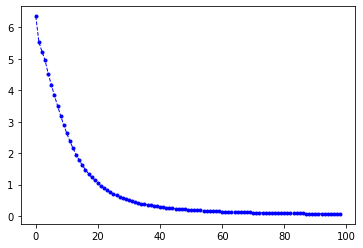

In [674]:
# plt.plot(range(epoch), error_history[:epoch], color='green', marker='o', linestyle='dashed',linewidth=1, markersize=3)
plt.plot(range(epoch), error_history[:epoch], marker='o',color='blue', markersize=3, linestyle='dashed',linewidth=1)
# plt.ylim(0, 9)
plt.show()

In [672]:
# Making predictions

In [ ]:
def predict(network, row):
    outputs = forward_propagate(network, row)
    return outputs.index(max(outputs))

In [ ]:
network

In [675]:
# Test makeing preductions with the network
# get 10 data sets with 2 features and 1 target value as the last elements {0, 1}

dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1],
    [7.673756466,3.508563011,1],
    [9.673756466,3.508563011,1]]

# len(dataset)

# load trained model from previously performed
network = network

# making predictions row by row
for row in dataset:
    prediction = predict(network, row)
    print('Expected %d, Got %d' %(row[-1], prediction))

Expected 0, Got 0
Expected 0, Got 0
Expected 0, Got 0
Expected 0, Got 0
Expected 0, Got 0
Expected 1, Got 1
Expected 1, Got 1
Expected 1, Got 1
Expected 1, Got 1
Expected 1, Got 1
Expected 1, Got 1
Expected 1, Got 1
